### IMPORT

In [56]:
import pickle
import json
import numpy as np
from sklearn.model_selection import train_test_split

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


### Artifacts yükle

In [28]:
ARTIFACTS_DIR = "/content/drive/MyDrive/project/artifacts"

with open(f"{ARTIFACTS_DIR}/sequences.pkl", "rb") as f:
    data = pickle.load(f)

sentences = data["sentences"]
next_chars = data["next_chars"]
vocab_size = data["vocab_size"]

with open(f"{ARTIFACTS_DIR}/char_to_idx.json", "r") as f:
    char_to_idx = json.load(f)


### X ve y için numpy array

In [29]:
sequence_length = len(sentences[0])
num_sequences = len(sentences)

X = np.zeros((num_sequences, sequence_length), dtype=np.int32)
y = np.zeros((num_sequences, vocab_size), dtype=np.bool_)


### Karakterleri index’e çevir

In [30]:
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t] = char_to_idx[char]
    y[i, char_to_idx[next_chars[i]]] = 1


## MODEL

In [31]:
embedding_dim = 64
lstm_units = 256


In [42]:
from tensorflow.keras.layers import Bidirectional, Dropout

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),

    Bidirectional(LSTM(
        lstm_units,
        return_sequences=True,
        dropout=0.2
    )),

    Bidirectional(LSTM(
        lstm_units // 2,
        dropout=0.2
    )),

    Dense(lstm_units // 2, activation="relu"),
    Dropout(0.3),
    Dense(vocab_size, activation="softmax")
])

In [57]:
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 40, 64)         │         2,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 40, 512)        │       657,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 256)            │       656,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 45)             │         5,805 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,066,121 (15.51 MB)

 Trainable params: 1,355,373 (5.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,710,748 (10.34 MB)

In [43]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam"
)



In [35]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.build(input_shape=(None, sequence_length))
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 40, 64)         │         2,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 40, 512)        │       657,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 256)            │       656,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 45)             │         5,805 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,355,373 (5.17 MB)

 Trainable params: 1,355,373 (5.17 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
y = y.astype("float32")


## MODEL EĞİTME

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)


from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    "/content/drive/MyDrive/project/artifacts/best_model.keras",
    monitor="val_loss",
    save_best_only=True
)


In [45]:
history = model.fit(
    X,
    y,
    batch_size=64,
    epochs=30,                # üst sınır
    validation_split=0.1,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/30
12637/12637 ━━━━━━━━━━━━━━━━━━━━ 246s 19ms/step - loss: 2.1351 - val_loss: 1.5751
Epoch 2/30
12637/12637 ━━━━━━━━━━━━━━━━━━━━ 275s 20ms/step - loss: 1.5402 - val_loss: 1.4698
Epoch 3/30
12637/12637 ━━━━━━━━━━━━━━━━━━━━ 250s 20ms/step - loss: 1.4485 - val_loss: 1.4205
Epoch 4/30
12637/12637 ━━━━━━━━━━━━━━━━━━━━ 239s 19ms/step - loss: 1.4083 - val_loss: 1.4020
Epoch 5/30
12637/12637 ━━━━━━━━━━━━━━━━━━━━ 263s 19ms/step - loss: 1.3851 - val_loss: 1.3913
Epoch 6/30
12637/12637 ━━━━━━━━━━━━━━━━━━━━ 266s 19ms/step - loss: 1.3678 - val_loss: 1.3794
Epoch 7/30
12637/12637 ━━━━━━━━━━━━━━━━━━━━ 241s 19ms/step - loss: 1.3570 - val_loss: 1.3762
Epoch 8/30
12637/12637 ━━━━━━━━━━━━━━━━━━━━ 239s 19ms/step - loss: 1.3478 - val_loss: 1.3720
Epoch 9/30
12637/12637 ━━━━━━━━━━━━━━━━━━━━ 239s 19ms/step - loss: 1.3415 - val_loss: 1.3631
Epoch 10/30
12637/12637 ━━━━━━━━━━━━━━━━━━━━ 262s 19ms/step - loss: 1.3346 - val_loss: 1.3657
Epoch 11/30
12637/12637 ━━━━━━━━━━━━━━━━━━━━ 240s 19ms/step - loss: 1

## DEĞERLENDİRME

In [46]:
import numpy as np

# Son epoch validation loss
final_val_loss = history.history["val_loss"][-1]

perplexity = np.exp(final_val_loss)

print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Perplexity: {perplexity:.2f}")


Final Validation Loss: 1.3380
Perplexity: 3.81


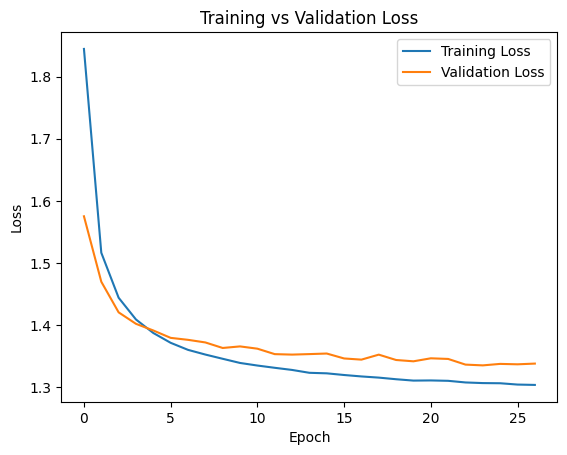

In [47]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


In [48]:
from tensorflow.keras.models import load_model

best_model = load_model(
    "/content/drive/MyDrive/project/artifacts/best_model.keras",
    compile=True
)


In [53]:


# Önce test ayır
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.1,
    random_state=42
)

# Sonra validation ayır
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.1111,  # ≈ %10
    random_state=42
)

print("Train:", X_train.shape)
print("Val:", X_val.shape)
print("Test:", X_test.shape)



Train: (718877, 40)
Val: (89850, 40)
Test: (89859, 40)


In [54]:
test_loss = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")



Test Loss: 1.2001


In [55]:


test_perplexity = np.exp(test_loss)
print(f"Test Perplexity: {test_perplexity:.2f}")


Test Perplexity: 3.32
